In [1]:
import sys
sys.path.append('/Users/huangxingyue/Desktop/NYU MFE/12 Capstone')
import math
import numpy as np
import pandas as pd
import itertools
from Pricing.SABR import SABR_model
from Pricing.black_pricing import BSPricer_SABR
from Pricing.pdf_calculation import numerical_pdf
from Pricing.cdf_calculation import numerical_cdf
from matplotlib import pyplot as plt
from Pricing.Arbitrage_check import arbitrage_check
from Pricing.MC_simulation import *
from Fitter.fitter import Fitter
from Pricing.BS import *

In [2]:
def numerical_cdf_MC(alpha,beta,rho,nu,F,K_spread,expiry,h=0.0001):
    price=[]
    price_plus=[]
    forwards=simulateSABRMonteCarloEuler(100000,40,expiry,F,alpha,beta,rho,nu)
    for K_spread_item in K_spread:
        option=[max(0, item-(F+K_spread_item)) for item in forwards]
        option_plus=[max(0, item-(F+K_spread_item+h)) for item in forwards]
        price.append(sum(option)/len(option))
        price_plus.append(sum(option_plus)/len(option_plus))
    cdf = -(np.array(price_plus)-np.array(price))/h
    return cdf

In [3]:
F=0.02
beta=0.9
rho=-0.8
nu=0.25
alpha=0.4*pow(F,(1-beta))
K_spread=np.arange(-0.0175,0.1,0.001)
K_MC=[F+item for item in K_spread]

In [4]:
cdf_MC=[]
cdf_MC.append(numerical_cdf_MC(alpha,beta,rho,nu,F,K_spread,5,h=0.0001))
cdf_MC.append(numerical_cdf_MC(alpha,beta,rho,nu,F,K_spread,10,h=0.0001))

In [5]:
F=[0.02,0.02]
beta=0.9
rho=-0.8
nu=0.25
alpha=0.4*pow(F[0],(1-beta))
expiry=np.array([5,10])
spread = np.arange(-0.0175,0.1,0.001)
K = [[0 for y in range(len(spread))] for x in range(len(F))]

for i in range(len(F)):
    for j in range(len(spread)):
        K[i][j]=F[i]+spread[j]        
K=np.array(K)

In [6]:
cdf_hagan=numerical_cdf(alpha,beta,rho,nu,F,K,expiry,1,0,0.001,vol_method='Hagan_ln')
cdf_obloj=numerical_cdf(alpha,beta,rho,nu,F,K,expiry,1,0,0.001,vol_method='Obloj')

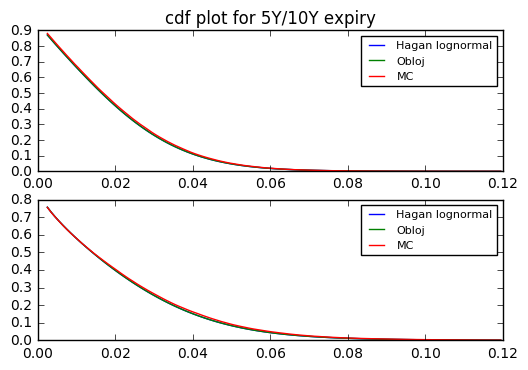

In [7]:
plt.figure(1)
plt.subplot(211)
plt.plot(K[0],cdf_hagan[0],label='Hagan lognormal')
plt.plot(K[0],cdf_obloj[0],label='Obloj')
plt.plot(K_MC,cdf_MC[0],label='MC')
plt.title('cdf plot for 5Y/10Y expiry')
plt.legend(prop={'size': 8})

plt.subplot(212)
plt.plot(K[1],cdf_hagan[1],label='Hagan lognormal')
plt.plot(K[1],cdf_obloj[1],label='Obloj')
plt.plot(K_MC,cdf_MC[1],label='MC')
plt.legend(prop={'size': 8})
plt.show()